# Analysis of the results of the LBP study

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Constants

In [2]:
results_path = "lbp_study_results.csv"

### Loading the data

In [3]:
data = pd.read_csv(results_path)

### Results analysis

#### Dataset visualization

In [4]:
data

,Color,Rescale,Radius,Points,Method,Blocks,Distance,MAP@1,MAP@5
0,gray,True,1,8,default,1,intersection,0.233333,0.286111
1,gray,True,1,8,default,1,correlation,0.233333,0.281667
2,gray,True,1,8,default,1,bhattacharyya,0.300000,0.325000
3,gray,True,1,8,default,4,intersection,0.400000,0.451111
4,gray,True,1,8,default,4,correlation,0.400000,0.430556
...,...,...,...,...,...,...,...,...,...
319,V,True,3,12,uniform,16,correlation,0.700000,0.725000
320,V,True,3,12,uniform,16,bhattacharyya,0.466667,0.537222
321,V,True,3,12,uniform,64,intersection,0.800000,0.841667
322,V,True,3,12,uniform,64,correlation,0.833333,0.866667


#### Sort by MAP@1 and MAP@5

In [5]:
data.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False]).head(n=30).reset_index(drop=True)

,Color,Rescale,Radius,Points,Method,Blocks,Distance,MAP@1,MAP@5
0,gray,True,2,10,default,64,intersection,1.000000,1.000000
1,gray,True,2,10,default,64,correlation,1.000000,1.000000
2,gray,True,2,10,default,64,bhattacharyya,1.000000,1.000000
3,gray,True,3,12,default,16,intersection,1.000000,1.000000
4,gray,True,3,12,default,16,bhattacharyya,1.000000,1.000000
5,gray,True,3,12,default,64,intersection,1.000000,1.000000
6,gray,True,3,12,default,64,bhattacharyya,1.000000,1.000000
7,L,True,2,10,default,64,intersection,1.000000,1.000000
8,L,True,2,10,default,64,correlation,1.000000,1.000000
9,L,True,2,10,default,64,bhattacharyya,1.000000,1.000000


- All the perfect combinations have used the default method.
- All the perfect combinations have used 2^16=65536-dimensional histograms, either using 10 points with 64 blocks, or 12 points with 16 blocks.
- The next-best combination that uses less than 65536-dimensional histograms has a MAP@1/MAP@5 of 0.900 and 0.933, and uses 16384-dimensional histograms.

#### Number of combinations with perfect metrics

In [6]:
# Filter the dataset
perfect_results = data[(data['MAP@1'] == 1.0) & (data['MAP@5'] == 1.0)]

# Calculate the absolute number and percentage
absolute_count = perfect_results.shape[0]
total_count = data.shape[0]
percentage = (absolute_count / total_count) * 100

absolute_count, percentage

(21, 6.481481481481481)

- There are 21 out of 324 combinations with perfect score (6.5%)

#### Distribution of MAP@1 and MAP@5 scores

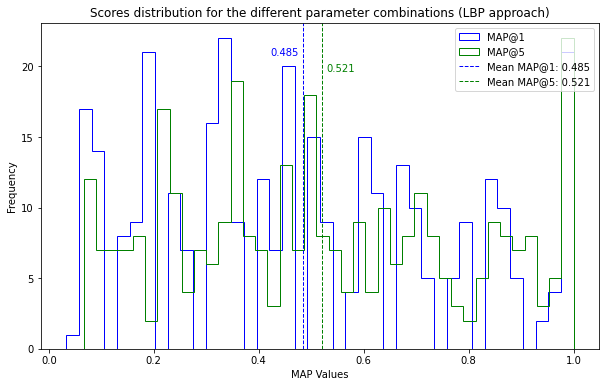

In [9]:
plt.figure(figsize=(10, 6))

# Plot MAP@1
plt.hist(data['MAP@1'], bins=40, histtype='step', linewidth=1, label='MAP@1', color='blue')

# Plot MAP@5
plt.hist(data['MAP@5'], bins=40, histtype='step', linewidth=1, label='MAP@5', color='green')

# Calculate means
mean_map1 = data['MAP@1'].mean()
mean_map5 = data['MAP@5'].mean()

# Plot vertical lines for the means
plt.axvline(mean_map1, color='blue', linestyle='--', linewidth=1, label=f'Mean MAP@1: {mean_map1:.3f}')
plt.axvline(mean_map5, color='green', linestyle='--', linewidth=1, label=f'Mean MAP@5: {mean_map5:.3f}')

# Add text for the means
plt.text(mean_map1-0.035, plt.ylim()[1] * 0.9, f'{mean_map1:.3f}', color='blue', ha='center')
plt.text(mean_map5+0.035, plt.ylim()[1] * 0.85, f'{mean_map5:.3f}', color='green', ha='center')

# Labels and title
plt.xlabel('MAP Values')
plt.ylabel('Frequency')
plt.title('Scores distribution for the different parameter combinations (LBP approach)')
plt.legend()

# Display the plot
plt.savefig("figs/score_distribution_LBP.jpg")
plt.show()

- The mean values of MAP@1 and MAP@5 across all combinations are 0.485 and 0.521 respectively.
- The distribution of scores is somewhat uniform.

#### Sorting by worst scores

In [12]:
data.sort_values(by=['MAP@1', 'MAP@5'], ascending=[True, True]).head(n=20).reset_index(drop=True)

,Color,Rescale,Radius,Points,Method,Blocks,Distance,MAP@1,MAP@5
0,V,True,2,10,uniform,1,intersection,0.033333,0.091667
1,V,True,1,8,uniform,1,correlation,0.066667,0.066667
2,V,True,1,8,ror,1,intersection,0.066667,0.073333
3,V,True,1,8,ror,1,correlation,0.066667,0.073333
4,V,True,1,8,uniform,1,intersection,0.066667,0.073333
5,V,True,1,8,uniform,1,bhattacharyya,0.066667,0.073333
6,L,True,1,8,uniform,1,intersection,0.066667,0.075000
7,L,True,1,8,uniform,1,correlation,0.066667,0.075000
8,gray,True,1,8,uniform,1,correlation,0.066667,0.077778
9,L,True,1,8,uniform,1,bhattacharyya,0.066667,0.077778


- The worst scores all have 1 block.
- The worst scores either use the ror or uniform method.

#### Mean score grouping by Color

In [13]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Color')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Color,,,,
L,0.496914,0.530787,7.261825,5.660629
gray,0.495062,0.529480,6.862092,5.400535
V,0.463272,0.502351,0.000000,0.000000


- The differences in color are very small.
- The V space seems to perform worse than gray or L.

#### Mean score grouping by (radius, points)

In [14]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Radius')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Radius,,,,
3,0.606481,0.642896,72.519754,68.149773
2,0.497222,0.537387,41.439860,40.553777
1,0.351543,0.382335,0.000000,0.000000


- There are significant differences between using different radius and number of points.
- A radius of 3 with 12 points performs, on average, 72.5% better than a radius of 1 with 8 points.

#### Plotting MAP@1 for different (Radius/Points) combinations using violin plots

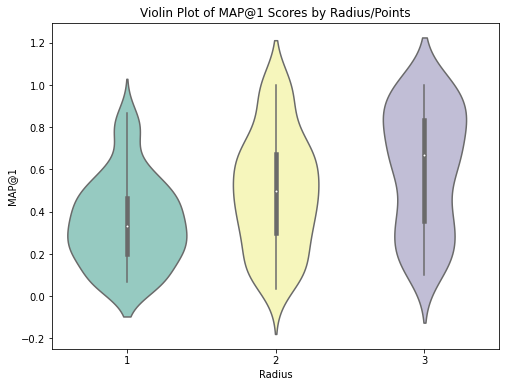

In [26]:
# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='Radius', y='MAP@1', data=data, palette="Set3")

plt.title('Violin Plot of MAP@1 Scores by Radius/Points')
plt.xlabel('Radius')
plt.ylabel('MAP@1')

plt.show()

#### Mean score grouping by method

In [15]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Method')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Method,,,,
default,0.708642,0.743030,96.575342,88.251010
ror,0.386111,0.424887,7.106164,7.647595
uniform,0.360494,0.394702,0.000000,0.000000


- The default method is about twice as good as ror or uniform.
- The ror method might not perform as well due to ending up with high-dimensional, sparse vectors.
- The uniform method might not perform as well due to compressing information in a small number of dimensions.

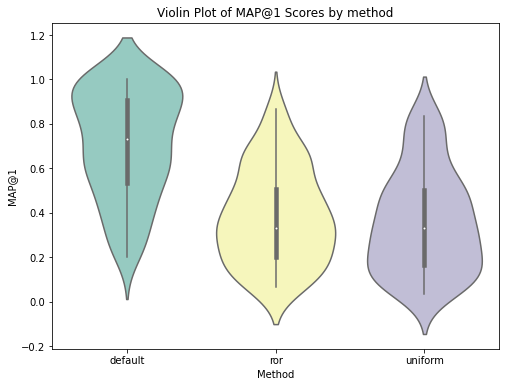

In [28]:
# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='Method', y='MAP@1', data=data, palette="Set3")

plt.title('Violin Plot of MAP@1 Scores by method')
plt.xlabel('Method')
plt.ylabel('MAP@1')

plt.show()

#### Mean score grouping by number of blocks

In [16]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Blocks')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Blocks,,,,
64,0.734979,0.767586,223.550725,190.708367
16,0.575720,0.611715,153.442029,131.675195
4,0.402469,0.440151,77.173913,66.698704
1,0.227160,0.264040,0.000000,0.000000


- As the number of blocks increases, the average performance is better. There are notable jumps in performance for each number of blocks.
- Using 64 blocks as opposed to 1, increases performance three-fold on average.

#### Plotting MAP@1 for different number of blocks using violin plots

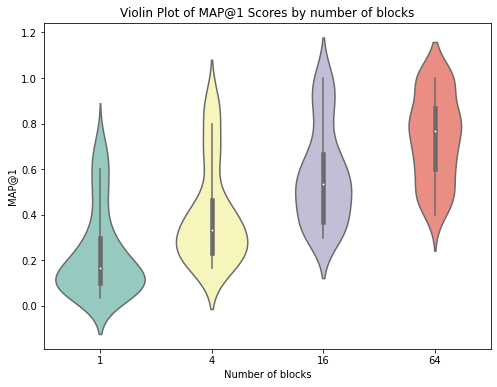

In [10]:
# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='Blocks', y='MAP@1', data=data, palette="Set3")

plt.title('Violin Plot of MAP@1 Scores by number of blocks')
plt.xlabel('Number of blocks')
plt.ylabel('MAP@1')

plt.savefig("figs/num_blocks_comparison_LBP.jpg")
plt.show()

#### Mean score grouping by distance measure

In [17]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Distance')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Distance,,,,
bhattacharyya,0.488580,0.522181,1.409353,1.068310
correlation,0.484877,0.523776,0.640615,1.376955
intersection,0.481790,0.516662,0.000000,0.000000


- There doesn't seem to be any significant differences between using different distance measures.
- Bhattacharyya performs slightly better than correlation or intersection on average.

### Choosing the best combination

We have seen that:
- L or gray color channels perform better on average, L being slightly better.
- There seem to be no significant difference between distance measures, although Bhattacharyya performs better on average.
- Using 64 blocks performs better on average.
- The default method performs significantly better than ror or uniform.
- Using the combination of radius 3 and 12 points performs better than the other combinations on average.

Considering the previous analysis, the following combinations (with perfect metrics in both MAP@1 and MAP@5), might be the best:
- L color with Bhattacharyya distance, radius 3 and 12 points, 16 blocks
- L color with Bhattacharyya distance, radius 3 and 12 points, 64 blocks

Both obtain perfect metrics, but the first one uses 65,536-dimensional histograms while the second one uses 262,144-dimensional histograms. The first one is more likely to generalize, so the best combination (using the clean dataset), is selected to be the following one:
- L color with Bhattacharyya distance, radius 3 and 12 points, 16 blocks